# Projeto de Redes Complexas 

## Integrantes

- Akemi 
- Caio Vinicius de Oliveira, Nº USP: 11932272
- Emerson
- Juan Lucas Montanaro, Nº USP: 11912787

---------------------------------------------------------------------------

## Qual tipo de modelo é mais adequado para redes sociais?

Primeiro passo, considerando as três redes sociais abaixo:

- Adolescente : Cada nó é uma pessoa e as conexões ocorrem se ela se diz amiga de outra pessoa
- Facebook : Cada nó é um usuário e as conexões ocorrem se um usuário é amigo do outro
- Hamsterster : Cada nó é um usuário e as conexões ocorrem se um usuário é amigo do outro

Rodamos simulações em python utilizando os seguintes modelos:
- Barabási-Albert
- Erdős–Rényi
- Watts-Strogatz com probabilidades de reconexão iguais à 1.0, 0.5 e 0.01.

E por fim calculamos várias medidas características para essas redes simuladas, sendo elas:

- Grau Médio
- Assortatividade
- Coeficiente de Clusterização
- Transitividade
- Entropia de Shannon
- Média dos Menores Caminhos
- Média da Intermediação
- Ponto Central de dominância
- Diâmetro
- Métrica S
- Quantidade de Baricentros
- Excentricidade Média
- $\rho$(Grau do Nó, Grau Médio dos Vizinhos)
- $\rho$(Grau do Nó, Centralidade de Proximidade)
- $\rho$(Grau do Nó, Cliques do Nó)

Agora, para o próximo passo, iremos analisar esses resultados das simulações e classificar as redes sociais como sendo mais similar a um dos cinco modelos propostos.

### Setup de Bibliotecas

In [40]:
# importações
from numpy import *
import numpy as np
import pandas as pd
import networkx as nx

import simulacao
from CONSTANTES import *

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

Deixamos no código o loop que utilizamos para simular todos os modelos, mas não recomendamos que isso seja executado, pois levam cerca 2.5 horas para que tudo seja concluído e estruturamos os códigos de simulação para salvar os resultados das métricas de cada modelo para que justamente não seja necessário executarmos as simulações diversas vezes e gastarmos todo esse tempo.

In [2]:
# executando as simulacoes:
# for modelo in SIMULE.keys():
#     simulacao.main(modelo)

### Leitura dos dados

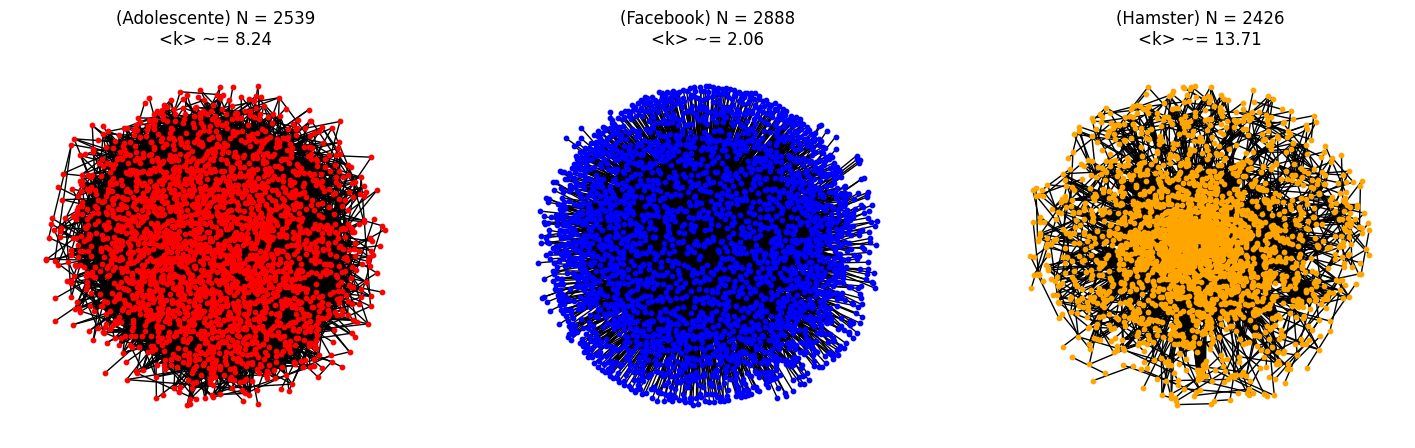

In [8]:
# carregando as redes sociais:
adol = ler_rede('adolescente', grafo=True)
face = ler_rede('facebook', grafo=True)
hams = ler_rede('hamster', grafo=True)

# gerando um grafico de todas elas
plt.figure(figsize=(18, 5))

pos_a = nx.spring_layout(adol, iterations=30, k=0.2)
pos_f = nx.spring_layout(face, iterations=20, k=0.1)
pos_h = nx.spring_layout(hams, iterations=30, k=0.1)

plt.subplot(1, 3, 1)
nx.draw(adol, pos_a, node_color='red', node_size=10, with_labels=False)
plt.title(f'(Adolescente) N = {len(adol)}\n<k> ~= {grau_medio(adol):.2f}')

plt.subplot(1, 3, 2)
nx.draw(face, pos_f, node_color='blue', node_size=10, with_labels=False)
plt.title(f'(Facebook) N = {len(face)}\n<k> ~= {grau_medio(face):.2f}')

plt.subplot(1, 3, 3)
nx.draw(hams, pos_h, node_color='orange', node_size=10, with_labels=False)
plt.title(f'(Hamster) N = {len(hams)}\n<k> ~= {grau_medio(hams):.2f}')

plt.show()

In [4]:
# carregando os resultados das simulacoes:
df_ba = pd.read_csv('Modelo_BA.csv')
df_ba['Modelo'] = 'BA'
df_er = pd.read_csv('Modelo_ER.csv')
df_er['Modelo'] = 'ER'
df_ws_p10 = pd.read_csv('Modelo_WS_p10.csv')
df_ws_p10['Modelo'] = 'WS p=1'
df_ws_p05 = pd.read_csv('Modelo_WS_p05.csv')
df_ws_p05['Modelo'] = 'WS p=0.5'
df_ws_p01 = pd.read_csv('Modelo_WS_p01.csv')
df_ws_p01['Modelo'] = 'WS p=0.01'

# definindo um unico dataframe com os resultados:
df = pd.concat(
    [df_ba, df_er, df_ws_p10, df_ws_p05, df_ws_p01],
    axis=0, ignore_index=True
)
del df_ba, df_er, df_ws_p10, df_ws_p05, df_ws_p01

print('Shape das simulacoes:', df.shape)
df.sample(10)

Shape das simulacoes: (450, 18)


,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques,Rede Social,Iteracao,Modelo
97,8.107171,0.002802,0.003075,0.003136,3.513930,3.976331,0.001174,0.004750,7.0,850153.0,1.0,5.770686,-0.009703,0.918901,0.993699,adolescente,8,ER
132,2.453099,-0.037809,0.000251,0.000492,2.221108,10.273586,0.003887,0.041937,26.0,27587.0,1.0,18.301088,-0.088613,0.612130,0.999592,facebook,13,ER
27,7.987397,-0.050772,0.016576,0.010534,3.318758,3.493760,0.000983,0.123526,6.0,3349671.0,1.0,4.892871,-0.101551,0.654263,0.996744,adolescente,28,BA
38,1.999308,-0.073608,0.000000,0.000000,1.762225,7.566661,0.002275,0.884855,19.0,116510.0,1.0,13.883310,-0.078095,0.259769,1.000000,facebook,9,BA
384,8.000000,-0.011678,0.621898,0.620258,0.504312,13.911205,0.005089,0.084754,35.0,651719.0,1.0,26.178417,-0.032112,0.072843,0.557635,adolescente,25,WS p=0.01
264,12.000000,-0.037177,0.004678,0.004603,3.318832,3.432819,0.001004,0.002128,5.0,2273960.0,1.0,4.754328,-0.142083,0.949311,0.975892,hamster,25,WS p=1
368,8.000000,-0.005123,0.625127,0.623709,0.453811,14.605886,0.005363,0.063404,37.0,651501.0,1.0,28.250887,-0.020102,0.067523,0.562444,adolescente,9,WS p=0.01
362,8.000000,-0.009810,0.624413,0.622890,0.481576,14.234174,0.005216,0.112905,35.0,651609.0,1.0,26.699095,-0.027817,0.057449,0.573130,adolescente,3,WS p=0.01
55,1.999308,-0.118575,0.000000,0.000000,1.740988,8.645429,0.002649,0.836591,21.0,92588.0,1.0,15.717105,-0.106842,0.250834,1.000000,facebook,26,BA
22,7.987397,-0.038422,0.019054,0.012406,3.333872,3.487950,0.000981,0.163937,6.0,3473575.0,1.0,4.862151,-0.086035,0.636112,0.993541,adolescente,23,BA


### Tratamentos

Vamos utilizar a Análise de Componentes Principais (PCA, na sigla em inglês) para reduzir a dimensão das medidas de forma que possamos construir um gráfico em 2D com as posições das simulações e das redes reais.
Porém, antes de construírmos o gráfico, precisamos completar os NaNs que pode ter surgido nas métricas das simulações, normalizá-las e ainda calcular as mesmas métricas para as redes sociais.

In [12]:
# verificando se ha NaNs:
print('Qtd de NaNs por coluna:')
df.isna().sum()

Qtd de NaNs por coluna:


grau_medio                        0
assortatividade                   0
coef_clusterizacao                0
transitividade                    0
entropia                          0
media_dos_menores_caminhos        0
intermediacao_media               0
ponto_central_de_dominancia       0
diametro                          0
metrica_s                         0
qtd_baricentros                   0
excentricidade_media              0
cor_grau_e_grau_medio_vizinhos    0
cor_grau_e_proximidade            0
cor_grau_e_cliques                0
Rede Social                       0
Iteracao                          0
Modelo                            0
dtype: int64

In [18]:
# algumas estatisticas das metricas
df.describe()

,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques,Iteracao
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000,4.500000e+02,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,7.490552,-0.052123,0.101055,0.099512,2.382483,32.328344,0.013841,0.183967,84.433333,1.765172e+06,1.013333,63.877404,-0.105976,0.540578,0.908914,15.500000
std,4.227592,0.058224,0.214835,0.214726,1.196851,74.364035,0.033205,0.258630,204.838719,2.422775e+06,0.114825,153.559386,0.094335,0.364331,0.187452,8.665075
min,1.999308,-0.238352,0.000000,0.000000,0.096932,3.055368,0.000848,0.001707,5.000000,5.226000e+03,1.000000,4.043694,-0.350773,0.045059,0.274683,1.000000
25%,2.000000,-0.060663,0.000000,0.000000,1.738459,3.495323,0.001004,0.003324,5.000000,2.840250e+04,1.000000,4.875443,-0.150962,0.110453,0.911518,8.000000
50%,8.000000,-0.039348,0.004632,0.004583,2.828149,4.204198,0.001263,0.051567,7.000000,7.309430e+05,1.000000,5.943875,-0.098016,0.637033,0.989938,15.500000
75%,12.000000,-0.009843,0.081270,0.075403,3.318561,13.676168,0.004997,0.418371,30.000000,2.267022e+06,1.000000,23.434718,-0.030387,0.915869,1.000000,23.000000
max,13.922506,0.037431,0.666158,0.665183,3.949879,446.309479,0.200253,0.925003,1213.000000,1.105353e+07,2.000000,903.076538,0.059437,0.959367,1.000000,30.000000


In [14]:
# separando as metricas:
X = df.drop(columns=['Rede Social', 'Iteracao', 'Modelo'])

# normalizando:
norm = StandardScaler().fit(X)
X_norm = norm.transform(X)

for i in range(X_norm.shape[1]):
    print(f'Coluna {i} \tMédia: {np.mean(X_norm[:, i]):.2f} \tVar: {np.var(X_norm[:, i]):.2f}')

Coluna 0 	Média: 0.00 	Var: 1.00
Coluna 1 	Média: 0.00 	Var: 1.00
Coluna 2 	Média: -0.00 	Var: 1.00
Coluna 3 	Média: -0.00 	Var: 1.00
Coluna 4 	Média: -0.00 	Var: 1.00
Coluna 5 	Média: 0.00 	Var: 1.00
Coluna 6 	Média: 0.00 	Var: 1.00
Coluna 7 	Média: -0.00 	Var: 1.00
Coluna 8 	Média: 0.00 	Var: 1.00
Coluna 9 	Média: 0.00 	Var: 1.00
Coluna 10 	Média: -0.00 	Var: 1.00
Coluna 11 	Média: 0.00 	Var: 1.00
Coluna 12 	Média: 0.00 	Var: 1.00
Coluna 13 	Média: 0.00 	Var: 1.00
Coluna 14 	Média: -0.00 	Var: 1.00


In [15]:
# para que possamos calcular as medidas dessas redes,
# precisamos que elas sejam totalmente conectadas, 
# entao vamos selecionar a maior componente de cada uma:

adol = adol.to_undirected()
# adol.remove_edges_from(nx.selfloop_edges(adol))
Gcc = sorted(nx.connected_components(adol), key=len, reverse=True)
adol = adol.subgraph(Gcc[0])
adol = nx.convert_node_labels_to_integers(adol, first_label=0)

print(f'(Adolescente) N={len(adol)} e <k>~={grau_medio(adol):.2f}')

face = face.to_undirected()
# face.remove_edges_from(nx.selfloop_edges(face))
Gcc = sorted(nx.connected_components(face), key=len, reverse=True)
face = face.subgraph(Gcc[0])
face = nx.convert_node_labels_to_integers(face, first_label=0)

print(f'(Facebook) N={len(face)} e <k>~={grau_medio(face):.2f}')

hams = hams.to_undirected()
# hams.remove_edges_from(nx.selfloop_edges(hams))
Gcc = sorted(nx.connected_components(hams), key=len, reverse=True)
hams = hams.subgraph(Gcc[0])
hams = nx.convert_node_labels_to_integers(hams, first_label=0)

print(f'(Hamster) N={len(hams)} e <k>~={grau_medio(hams):.2f}')

(Adolescente) N=2539 e <k>~=8.24
(Facebook) N=2888 e <k>~=2.06
(Hamters) N=2000 e <k>~=16.10


In [16]:
# calculando as medidas para cada rede:
X_adol = pd.DataFrame(calcula_medidas(adol), index=[1])
X_face = pd.DataFrame(calcula_medidas(face), index=[2])
X_hams = pd.DataFrame(calcula_medidas(hams), index=[3])

# juntando tudo:
X_real = pd.concat([X_adol, X_face, X_hams], axis=0, ignore_index=True)
del X_adol, X_face, X_hams

print(X_real)

   grau_medio  assortatividade  coef_clusterizacao  transitividade  entropia   
0    8.235526         0.251286            0.146677        0.141888  4.055626  \
1    2.064404        -0.668214            0.027247        0.000359  0.254405   
2   16.098000         0.022724            0.540091        0.229441  5.267414   

   media_dos_menores_caminhos  intermediacao_media   
0                    4.559388             0.001403  \
1                    3.867421             0.000994   
2                    3.588979             0.001296   

   ponto_central_de_dominancia  diametro   metrica_s  qtd_baricentros   
0                     0.010862      10.0   1205668.0              1.0  \
1                     0.548903       9.0   2298934.0              1.0   
2                     0.079839      10.0  31553788.0              1.0   

   excentricidade_media  cor_grau_e_grau_medio_vizinhos   
0              7.515557                        0.485549  \
1              6.759695                       -0.09

In [17]:
# normalizando as medidas reais tambem:
X_real_norm = norm.transform(X_real)
print(X_real_norm)

[[  0.17641331   5.216904     0.21259587   0.19757092   1.3995095
   -0.37383476  -0.3749835   -0.6700602   -0.36377975  -0.23119213
   -0.11624764  -0.36744466   6.27744      0.58590215   0.1956356 ]
 [ -1.2849362  -10.593255    -0.34393546  -0.46227777  -1.7800424
   -0.38315025  -0.3873275    1.4126043   -0.36866707   0.2205554
   -0.11624764  -0.37237242   0.12988006  -1.1644276    0.4862742 ]
 [  2.0382826    1.2869442    2.045874     0.6057649    2.4131162
   -0.38689873  -0.37821567  -0.40306258  -0.36377975  12.308929
   -0.11624764  -0.37049937   2.6947958    0.36632958  -0.28319272]]


### Verificando graficamente à qual modelo as redes se assemelham

Agora sim podemos aplicar o PCA e construir o gráfico.

In [21]:
# pca
pca = PCA(n_components=2).fit(X_norm)

print(f"Auto-valores:\n", pca.explained_variance_, "\n")
print(f"Auto-vetores:\n", pca.components_, "\n")
print(f"Variância explicada:\n", pca.explained_variance_ratio_)

Auto-valores:
 [5.82483843 4.07088043] 

Auto-vetores:
 [[-0.32761435 -0.14689154 -0.056625   -0.05496599 -0.29414167  0.36770072
   0.36292658  0.30371566  0.36737873 -0.21535164  0.06023076  0.36725455
  -0.07092904 -0.29940783  0.06825641]
 [ 0.12741774  0.25815319  0.47362476  0.47390992 -0.31842951  0.03628061
   0.03226823 -0.10404304  0.03511684 -0.03064164 -0.00659197  0.03543818
   0.29081735 -0.21959769 -0.46622045]] 

Variância explicada:
 [0.38745962 0.27078894]


In [82]:
# Tranformando X
X_pca = pca.transform(X_norm)
X_real_pca = pca.transform(X_real_norm)

# Visualizando
df_pca = pd.DataFrame(X_pca, columns = ['pc1','pc2'])
df_pca['Modelo'] = df['Modelo']
df_pca['Rede'] = df['Rede Social']


fig = px.scatter(df_pca, x='pc1', y='pc2', color='Modelo', facet_col='Rede',
                 width=1000, height=400)

for i in range(X_real_pca.shape[0]):
    fig.add_scatter(x=[X_real_pca[i, 0]], y=[X_real_pca[i, 1]],
                    row=[1], col=[i+1], marker={'color': 'deeppink', 'size': 15},
                    mode='markers', name='Rede Real'
    )

fig.update_xaxes(matches=None)
fig.update_layout(
    margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

### Treinando um Classificador para os Modelos

In [112]:
# separando as variaveis de treino:
X = df_pca[['pc1','pc2']]
y = df_pca[['Modelo']].to_numpy().ravel()

# avaliando o modelo
model = RandomForestClassifier()
scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Resultados
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.95 (+/- 0.04)


In [113]:
# treinando o modelo com todos os dados:
model.fit(X, y)

RandomForestClassifier()

### Predição para descobrir à qual modelo as redes mais se adequam

In [114]:
# ajustando as variaveis de teste:
X_real_pca = pd.DataFrame(X_real_pca, columns=['pc1','pc2'])
X_real_pca

,pc1,pc2
0,-2.568853,2.749738
1,2.738990,-2.852302
2,-5.365311,1.528258


In [115]:
# classificando as redes sociais:
X_real['predict'] = model.predict(X_real_pca)
X_real

,grau_medio,assortatividade,coef_clusterizacao,transitividade,entropia,media_dos_menores_caminhos,intermediacao_media,ponto_central_de_dominancia,diametro,metrica_s,qtd_baricentros,excentricidade_media,cor_grau_e_grau_medio_vizinhos,cor_grau_e_proximidade,cor_grau_e_cliques,predict
0,8.235526,0.251286,0.146677,0.141888,4.055626,4.559388,0.001403,0.010862,10.0,1205668.0,1.0,7.515557,0.485549,0.753804,0.945545,WS p=0.01
1,2.064404,-0.668214,0.027247,0.000359,0.254405,3.867421,0.000994,0.548903,9.0,2298934.0,1.0,6.759695,-0.093737,0.116812,0.999966,WS p=1
2,16.098000,0.022724,0.540091,0.229441,5.267414,3.588979,0.001296,0.079839,10.0,31553788.0,1.0,7.047000,0.147956,0.673895,0.855888,ER


### Conclusão